<a href="https://colab.research.google.com/github/Aruna45-star/Fmml-labs-2024/blob/main/FMML_M9_L_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

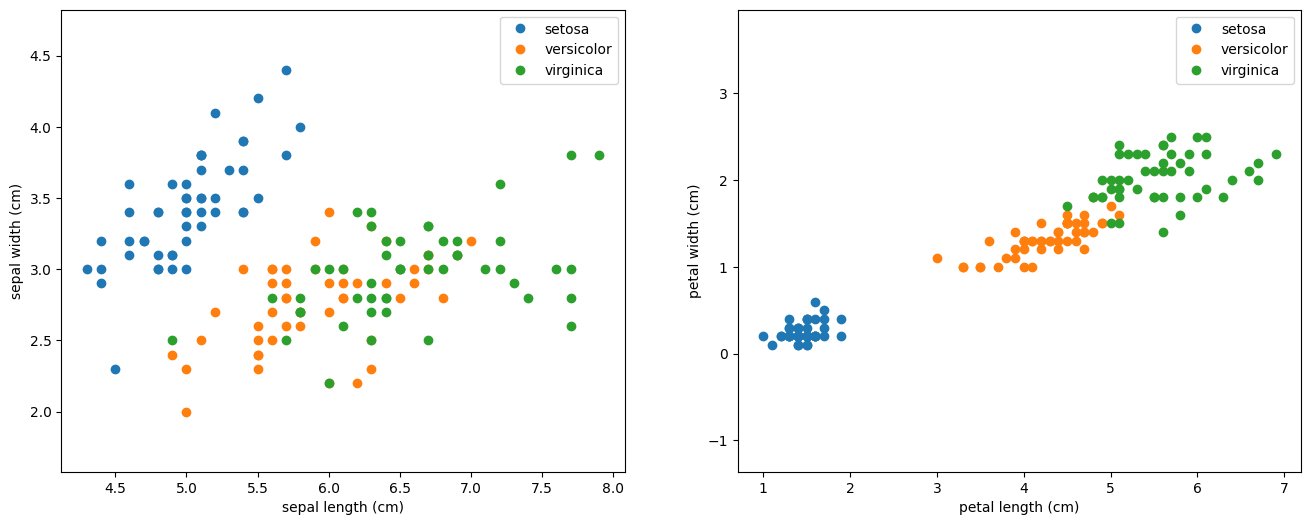

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 415.50it/s]


# Plot training progress

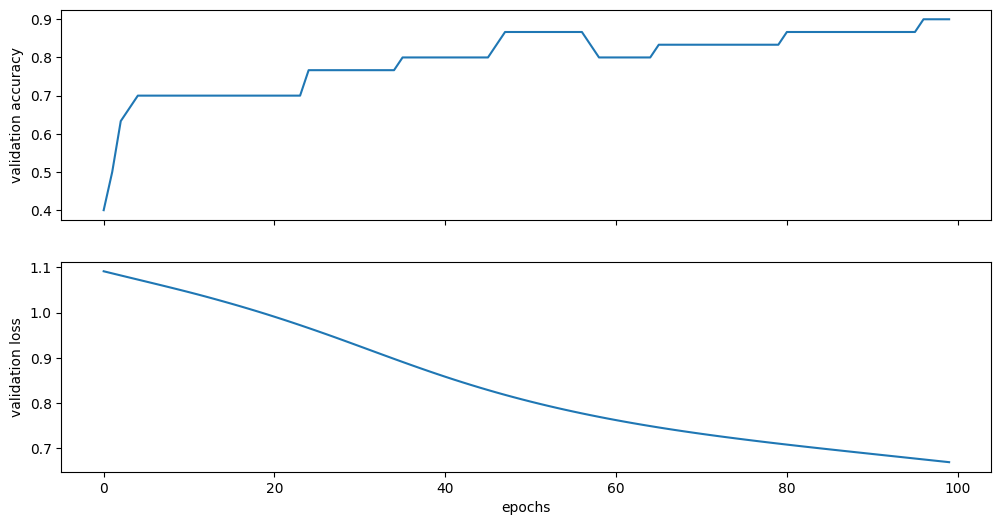

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

𝗔𝗡𝗦𝗪𝗘𝗥: 𝟭

𝗖𝗵𝗮𝗻𝗴𝗶𝗻𝗴 𝘁𝗵𝗲 𝗻𝘂𝗺𝗯𝗲𝗿 𝗼𝗳 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀 𝗶𝗻 𝗮 𝗻𝗲𝘂𝗿𝗮𝗹 𝗻𝗲𝘁𝘄𝗼𝗿𝗸 𝗰𝗮𝗻 𝘀𝗶𝗴𝗻𝗶𝗳𝗶𝗰𝗮𝗻𝘁𝗹𝘆 𝗮𝗳𝗳𝗲𝗰𝘁 𝗶𝘁𝘀 𝗮𝗯𝗶𝗹𝗶𝘁𝘆 𝘁𝗼 𝗹𝗲𝗮𝗿𝗻 𝗽𝗮𝘁𝘁𝗲𝗿𝗻𝘀 𝗳𝗿𝗼𝗺 𝗱𝗮𝘁𝗮. 𝗛𝗲𝗿𝗲'𝘀 𝗮 𝗯𝗿𝗶𝗲𝗳 𝗼𝘃𝗲𝗿𝘃𝗶𝗲𝘄 𝗼𝗳 𝗵𝗼𝘄 𝘁𝗼 𝗮𝗽𝗽𝗿𝗼𝗮𝗰𝗵 𝗶𝘁:

𝟭. 𝗦𝗵𝗮𝗹𝗹𝗼𝘄 𝗡𝗲𝘁𝘄𝗼𝗿𝗸 (𝟭-𝟮 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀):

𝗚𝗼𝗼𝗱 𝗳𝗼𝗿 𝘀𝗶𝗺𝗽𝗹𝗲𝗿 𝗽𝗿𝗼𝗯𝗹𝗲𝗺𝘀.

𝗟𝗲𝘀𝘀 𝗿𝗶𝘀𝗸 𝗼𝗳 𝗼𝘃𝗲𝗿𝗳𝗶𝘁𝘁𝗶𝗻𝗴.

𝗙𝗮𝘀𝘁𝗲𝗿 𝘁𝗼 𝘁𝗿𝗮𝗶𝗻.



𝟮. 𝗗𝗲𝗲𝗽𝗲𝗿 𝗡𝗲𝘁𝘄𝗼𝗿𝗸 (𝟯+ 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀):

𝗖𝗮𝗻 𝗰𝗮𝗽𝘁𝘂𝗿𝗲 𝗺𝗼𝗿𝗲 𝗰𝗼𝗺𝗽𝗹𝗲𝘅 𝗽𝗮𝘁𝘁𝗲𝗿𝗻𝘀.

𝗠𝗼𝗿𝗲 𝗲𝘅𝗽𝗿𝗲𝘀𝘀𝗶𝘃𝗲, 𝗯𝘂𝘁 𝗺𝗮𝘆 𝗼𝘃𝗲𝗿𝗳𝗶𝘁 𝗶𝗳 𝗻𝗼𝘁 𝗲𝗻𝗼𝘂𝗴𝗵 𝗱𝗮𝘁𝗮 𝗼𝗿 𝗿𝗲𝗴𝘂𝗹𝗮𝗿𝗶𝘇𝗮𝘁𝗶𝗼𝗻.

𝗦𝗹𝗼𝘄𝗲𝗿 𝘁𝗿𝗮𝗶𝗻𝗶𝗻𝗴, 𝗽𝗼𝘁𝗲𝗻𝘁𝗶𝗮𝗹𝗹𝘆 𝘃𝗮𝗻𝗶𝘀𝗵𝗶𝗻𝗴/𝗲𝘅𝗽𝗹𝗼𝗱𝗶𝗻𝗴 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁𝘀 (𝘂𝘀𝗲 𝗥𝗲𝗟𝗨, 𝗕𝗮𝘁𝗰𝗵𝗡𝗼𝗿𝗺, 𝗲𝘁𝗰.).




𝗘𝘅𝗮𝗺𝗽𝗹𝗲 𝗶𝗻 𝗣𝘆𝗧𝗼𝗿𝗰𝗵 (𝗶𝗳 𝘆𝗼𝘂'𝗿𝗲 𝘂𝘀𝗶𝗻𝗴 𝗶𝘁):

# 𝟮 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀
𝗺𝗼𝗱𝗲𝗹 = 𝗻𝗻.𝗦𝗲𝗾𝘂𝗲𝗻𝘁𝗶𝗮𝗹(
    𝗻𝗻.𝗟𝗶𝗻𝗲𝗮𝗿(𝗶𝗻𝗽𝘂𝘁_𝘀𝗶𝘇𝗲, 𝟭𝟮𝟴),
    𝗻𝗻.𝗥𝗲𝗟𝗨(),
    𝗻𝗻.𝗟𝗶𝗻𝗲𝗮𝗿(𝟭𝟮𝟴, 𝟲𝟰),
    𝗻𝗻.𝗥𝗲𝗟𝗨(),
    𝗻𝗻.𝗟𝗶𝗻𝗲𝗮𝗿(𝟲𝟰, 𝗼𝘂𝘁𝗽𝘂𝘁_𝘀𝗶𝘇𝗲)
)

𝗪𝗼𝘂𝗹𝗱 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲 𝗵𝗲𝗹𝗽 𝗺𝗼𝗱𝗶𝗳𝘆𝗶𝗻𝗴 𝗮 𝘀𝗽𝗲𝗰𝗶𝗳𝗶𝗰 𝗺𝗼𝗱𝗲𝗹/𝗰𝗼𝗱𝗲 𝘀𝗻𝗶𝗽𝗽𝗲𝘁?

In [ ]:
# 2 hidden layers
# Assuming X_train.shape[1] represents the number of features (input size)
# and 3 represents the number of classes (output size)
input_size = X_train.shape[1]
output_size = 3  # Number of classes in the iris dataset

model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, output_size)
)

𝗔𝗡𝗦𝗪𝗘𝗥: 𝟮



𝗜𝗻 𝗮 𝗻𝗲𝘂𝗿𝗮𝗹 𝗻𝗲𝘁𝘄𝗼𝗿𝗸, 𝗲𝗮𝗰𝗵 𝗹𝗮𝘆𝗲𝗿 𝗰𝗼𝗻𝘀𝗶𝘀𝘁𝘀 𝗼𝗳 𝗻𝗲𝘂𝗿𝗼𝗻𝘀 (𝘂𝗻𝗶𝘁𝘀). 𝗡𝗲𝘂𝗿𝗼𝗻𝘀 𝗽𝗿𝗼𝗰𝗲𝘀𝘀 𝗮𝗻𝗱 𝘁𝗿𝗮𝗻𝘀𝗳𝗼𝗿𝗺 𝘁𝗵𝗲 𝗶𝗻𝗽𝘂𝘁 𝗱𝗮𝘁𝗮 𝗯𝗲𝗳𝗼𝗿𝗲 𝗽𝗮𝘀𝘀𝗶𝗻𝗴 𝗶𝘁 𝘁𝗼 𝘁𝗵𝗲 𝗻𝗲𝘅𝘁 𝗹𝗮𝘆𝗲𝗿.


𝗧𝗼𝗼 𝗙𝗲𝘄 𝗡𝗲𝘂𝗿𝗼𝗻𝘀 → 𝗨𝗻𝗱𝗲𝗿𝗳𝗶𝘁𝘁𝗶𝗻𝗴 (𝗺𝗼𝗱𝗲𝗹 𝘁𝗼𝗼 𝘀𝗶𝗺𝗽𝗹𝗲).

𝗧𝗼𝗼 𝗠𝗮𝗻𝘆 𝗡𝗲𝘂𝗿𝗼𝗻𝘀 → 𝗢𝘃𝗲𝗿𝗳𝗶𝘁𝘁𝗶𝗻𝗴 (𝗺𝗼𝗱𝗲𝗹 𝘁𝗼𝗼 𝗰𝗼𝗺𝗽𝗹𝗲𝘅, 𝗺𝗲𝗺𝗼𝗿𝗶𝘇𝗲𝘀 𝘁𝗿𝗮𝗶𝗻𝗶𝗻𝗴 𝗱𝗮𝘁𝗮).

𝗥𝗶𝗴𝗵𝘁 𝗔𝗺𝗼𝘂𝗻𝘁 → 𝗟𝗲𝗮𝗿𝗻𝘀 𝗽𝗮𝘁𝘁𝗲𝗿𝗻𝘀 𝘄𝗲𝗹𝗹 𝘄𝗶𝘁𝗵𝗼𝘂𝘁 𝗼𝘃𝗲𝗿𝗳𝗶𝘁𝘁𝗶𝗻𝗴.


𝗚𝗲𝗻𝗲𝗿𝗮𝗹 𝗚𝘂𝗶𝗱𝗲𝗹𝗶𝗻𝗲𝘀:

𝗦𝘁𝗮𝗿𝘁 𝘄𝗶𝘁𝗵 𝟭–𝟮 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀.

𝗖𝗼𝗺𝗺𝗼𝗻 𝗻𝗲𝘂𝗿𝗼𝗻 𝗰𝗼𝘂𝗻𝘁𝘀: 𝟭𝟲, 𝟯𝟮, 𝟲𝟰, 𝟭𝟮𝟴, 𝟮𝟱𝟲.

𝗨𝘀𝗲 𝗥𝗲𝗟𝗨 𝗮𝘀 𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗶𝗼𝗻 𝗳𝗼𝗿 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀.

𝗨𝘀𝗲 𝘃𝗮𝗹𝗶𝗱𝗮𝘁𝗶𝗼𝗻 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆/𝗹𝗼𝘀𝘀 𝘁𝗼 𝗳𝗶𝗻𝗱 𝘁𝗵𝗲 𝗯𝗲𝘀𝘁 𝗻𝘂𝗺𝗯𝗲𝗿.

𝗔𝗡𝗦𝗪𝗘𝗥 : 𝟯


𝗖𝗼𝗺𝗺𝗼𝗻 𝗔𝗰𝘁𝗶𝘃𝗮𝘁𝗶𝗼𝗻 𝗙𝘂𝗻𝗰𝘁𝗶𝗼𝗻𝘀

𝟭. 𝗥𝗲𝗟𝗨 (𝗥𝗲𝗰𝘁𝗶𝗳𝗶𝗲𝗱 𝗟𝗶𝗻𝗲𝗮𝗿 𝗨𝗻𝗶𝘁)

𝗙𝗼𝗿𝗺𝘂𝗹𝗮: 𝗳(𝘅) = 𝗺𝗮𝘅(𝟬, 𝘅)

𝗠𝗼𝘀𝘁 𝗰𝗼𝗺𝗺𝗼𝗻𝗹𝘆 𝘂𝘀𝗲𝗱 𝗶𝗻 𝗵𝗶𝗱𝗱𝗲𝗻 𝗹𝗮𝘆𝗲𝗿𝘀

𝗙𝗮𝘀𝘁 𝗮𝗻𝗱 𝗲𝗳𝗳𝗶𝗰𝗶𝗲𝗻𝘁

𝗔𝘃𝗼𝗶𝗱𝘀 𝘃𝗮𝗻𝗶𝘀𝗵𝗶𝗻𝗴 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁 𝗽𝗿𝗼𝗯𝗹𝗲𝗺

𝗕𝘂𝘁 𝗰𝗮𝗻 𝗰𝗮𝘂𝘀𝗲 “𝗱𝗲𝗮𝗱 𝗻𝗲𝘂𝗿𝗼𝗻𝘀” (𝘄𝗵𝗲𝗻 𝗻𝗲𝘂𝗿𝗼𝗻𝘀 𝗼𝘂𝘁𝗽𝘂𝘁 𝘇𝗲𝗿𝗼 𝗮𝗹𝘄𝗮𝘆𝘀)


𝗨𝘀𝗲 𝘄𝗵𝗲𝗻: 𝗬𝗼𝘂 𝘄𝗮𝗻𝘁 𝗳𝗮𝘀𝘁, 𝘀𝘁𝗮𝗯𝗹𝗲 𝘁𝗿𝗮𝗶𝗻𝗶𝗻𝗴.


---

𝟮. 𝗦𝗶𝗴𝗺𝗼𝗶𝗱

𝗙𝗼𝗿𝗺𝘂𝗹𝗮: 𝗳(𝘅) = 𝟭 / (𝟭 + 𝗲^(-𝘅))

𝗢𝘂𝘁𝗽𝘂𝘁𝘀 𝘃𝗮𝗹𝘂𝗲𝘀 𝗯𝗲𝘁𝘄𝗲𝗲𝗻 𝟬 𝗮𝗻𝗱 𝟭

𝗚𝗼𝗼𝗱 𝗳𝗼𝗿 𝗯𝗶𝗻𝗮𝗿𝘆 𝗰𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 (𝗲𝘀𝗽𝗲𝗰𝗶𝗮𝗹𝗹𝘆 𝗼𝘂𝘁𝗽𝘂𝘁 𝗹𝗮𝘆𝗲𝗿)

𝗖𝗮𝗻 𝗰𝗮𝘂𝘀𝗲 𝘃𝗮𝗻𝗶𝘀𝗵𝗶𝗻𝗴 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁𝘀 𝗶𝗻 𝗱𝗲𝗲𝗽 𝗻𝗲𝘁𝘄𝗼𝗿𝗸𝘀


𝗨𝘀𝗲 𝘄𝗵𝗲𝗻: 𝗬𝗼𝘂 𝗻𝗲𝗲𝗱 𝗽𝗿𝗼𝗯𝗮𝗯𝗶𝗹𝗶𝘁𝗶𝗲𝘀 (𝗲.𝗴., 𝗶𝗻 𝗯𝗶𝗻𝗮𝗿𝘆 𝗼𝘂𝘁𝗽𝘂𝘁 𝗹𝗮𝘆𝗲𝗿).


---

𝟯. 𝗧𝗮𝗻𝗵 (𝗛𝘆𝗽𝗲𝗿𝗯𝗼𝗹𝗶𝗰 𝗧𝗮𝗻𝗴𝗲𝗻𝘁)

𝗙𝗼𝗿𝗺𝘂𝗹𝗮: 𝗳(𝘅) = (𝗲^𝘅 - 𝗲^(-𝘅)) / (𝗲^𝘅 + 𝗲^(-𝘅))

𝗢𝘂𝘁𝗽𝘂𝘁𝘀 𝗯𝗲𝘁𝘄𝗲𝗲𝗻 -𝟭 𝗮𝗻𝗱 𝟭

𝗖𝗲𝗻𝘁𝗲𝗿𝗲𝗱 𝗮𝗿𝗼𝘂𝗻𝗱 𝘇𝗲𝗿𝗼 → 𝗯𝗲𝘁𝘁𝗲𝗿 𝘁𝗵𝗮𝗻 𝘀𝗶𝗴𝗺𝗼𝗶𝗱

𝗦𝘁𝗶𝗹𝗹 𝗰𝗮𝗻 𝘀𝘂𝗳𝗳𝗲𝗿 𝗳𝗿𝗼𝗺 𝘃𝗮𝗻𝗶𝘀𝗵𝗶𝗻𝗴 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁𝘀


𝗨𝘀𝗲 𝘄𝗵𝗲𝗻: 𝗬𝗼𝘂 𝘄𝗮𝗻𝘁 𝘇𝗲𝗿𝗼-𝗰𝗲𝗻𝘁𝗲𝗿𝗲𝗱 𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗶𝗼𝗻 (𝗯𝗲𝘁𝘁𝗲𝗿 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁 𝗳𝗹𝗼𝘄).


---

𝟰. 𝗟𝗲𝗮𝗸𝘆 𝗥𝗲𝗟𝗨

𝗙𝗼𝗿𝗺𝘂𝗹𝗮:
𝗳(𝘅) = 𝘅 𝗶𝗳 𝘅 > 𝟬 𝗲𝗹𝘀𝗲 α𝘅 (α 𝗶𝘀 𝘀𝗺𝗮𝗹𝗹, 𝗹𝗶𝗸𝗲 𝟬.𝟬𝟭)

𝗙𝗶𝘅𝗲𝘀 𝗱𝗲𝗮𝗱 𝗻𝗲𝘂𝗿𝗼𝗻 𝗽𝗿𝗼𝗯𝗹𝗲𝗺 𝗶𝗻 𝗥𝗲𝗟𝗨

𝗔𝗹𝗹𝗼𝘄𝘀 𝗮 𝘀𝗺𝗮𝗹𝗹 𝗴𝗿𝗮𝗱𝗶𝗲𝗻𝘁 𝘄𝗵𝗲𝗻 𝘅 < 𝟬


𝗨𝘀𝗲 𝘄𝗵𝗲𝗻: 𝗬𝗼𝘂 𝘄𝗮𝗻𝘁 𝗥𝗲𝗟𝗨 𝗯𝗲𝗻𝗲𝗳𝗶𝘁𝘀 𝗯𝘂𝘁 𝗮𝘃𝗼𝗶𝗱 𝗱𝗲𝗮𝗱 𝗻𝗲𝘂𝗿𝗼𝗻𝘀.


---

𝗛𝗼𝘄 𝗧𝗵𝗲𝘆 𝗔𝗳𝗳𝗲𝗰𝘁 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴

𝗧𝗿𝗮𝗶𝗻𝗶𝗻𝗴 𝘀𝗽𝗲𝗲𝗱: 𝗥𝗲𝗟𝗨 𝗶𝘀 𝘂𝘀𝘂𝗮𝗹𝗹𝘆 𝗳𝗮𝘀𝘁𝗲𝗿.

𝗚𝗿𝗮𝗱𝗶𝗲𝗻𝘁 𝗳𝗹𝗼𝘄: 𝗧𝗮𝗻𝗵 𝗮𝗻𝗱 𝗟𝗲𝗮𝗸𝘆𝗥𝗲𝗟𝗨 𝗵𝗲𝗹𝗽 𝗺𝗼𝗿𝗲 𝘁𝗵𝗮𝗻 𝗦𝗶𝗴𝗺𝗼𝗶𝗱 𝗶𝗻 𝗱𝗲𝗲𝗽𝗲𝗿 𝗹𝗮𝘆𝗲𝗿𝘀.

𝗔𝗰𝗰𝘂𝗿𝗮𝗰𝘆: 𝗗𝗲𝗽𝗲𝗻𝗱𝘀 𝗼𝗻 𝘆𝗼𝘂𝗿 𝗱𝗮𝘁𝗮; 𝘁𝗲𝘀𝘁 𝗺𝘂𝗹𝘁𝗶𝗽𝗹𝗲 (𝗹𝗶𝗸𝗲 𝘆𝗼𝘂’𝗿𝗲 𝗱𝗼𝗶𝗻𝗴!) 𝘁𝗼 𝗳𝗶𝗻𝗱 𝘁𝗵𝗲 𝗯𝗲𝘀𝘁.



---

𝗪𝗮𝗻𝘁 𝗺𝗲 𝘁𝗼 𝘀𝘂𝗺𝗺𝗮𝗿𝗶𝘇𝗲 𝘁𝗵𝗶𝘀 𝗶𝗻𝘁𝗼 𝗮 𝘁𝗮𝗯𝗹𝗲 𝗼𝗿 𝘀𝗹𝗶𝗱𝗲-𝘀𝘁𝘆𝗹𝗲 𝗳𝗼𝗿𝗺𝗮𝘁 𝗳𝗼𝗿 𝘆𝗼𝘂𝗿 𝗽𝗿𝗼𝗷𝗲𝗰𝘁 𝗼𝗿 𝗿𝗲𝗽𝗼𝗿𝘁?